In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
# Optou-se pelo fashion mnist por ser um dataset mais complexo que o mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 # Normalização
print("x_train.shape:", x_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# Precisamos adicionar mais uma dimensão para o canal de cor
x_train = np.expand_dims(x_train, -1) # Adiciona uma dimensão no final (-1 acessa a última dimensão)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [4]:
K = len(set(y_train))
print("Número de classes:", K)

Número de classes: 10


In [6]:
# Criando a CNN
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) # Um filtro 3x3 reduzirá as imagens pela metade
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x) # Note o aumento do número de filtros
x = Flatten()(x) # Camada de planarização
# Camada densa
x = Dropout(0.2)(x) # Dropout para evitar overfitting (Durante as aulas, o autor disse que pode não ser interessante usar dropout em CNNs)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x) # Utilizamos a função softmax para a camada de saída (classificação multiclasse)

model = Model(i, x) # Criando o modelo

In [11]:
# Compilando o modelo
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', # Utilizamos sparse_categorical_crossentropy pois as labels não estão no formato one-hot
              metrics=['accuracy'])

# Treinamento
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7447 - loss: 0.7013 - val_accuracy: 0.8486 - val_loss: 0.4038
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8590 - loss: 0.3759 - val_accuracy: 0.8683 - val_loss: 0.3508
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8792 - loss: 0.3181 - val_accuracy: 0.8846 - val_loss: 0.3200
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8949 - loss: 0.2802 - val_accuracy: 0.8843 - val_loss: 0.3148
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9011 - loss: 0.2603 - val_accuracy: 0.8891 - val_loss: 0.2979
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9124 - loss: 0.2317 - val_accuracy: 0.8945 - val_loss: 0.2988
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9178 - loss: 0.2161 - val_accuracy: 0.8942 - val_loss: 0.3049
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9251 - loss: 0

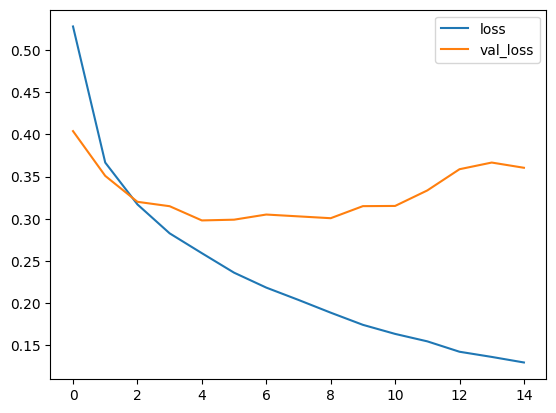

In [12]:
# Mostrando os resultados do treinamento
plt.plot(r.history['loss'], label='loss') # Erro do treinamento
plt.plot(r.history['val_loss'], label='val_loss') # Erro da validação
plt.legend()

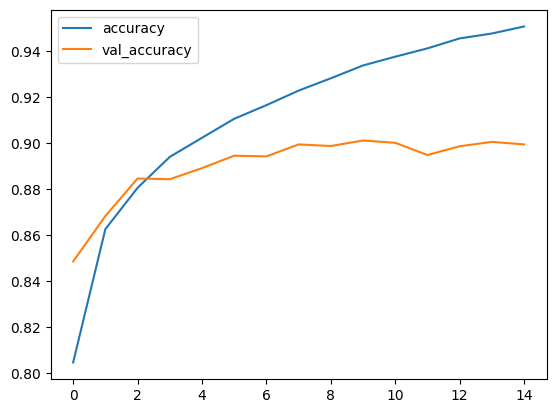

In [13]:
# Acurácia do modelo
plt.plot(r.history['accuracy'], label='accuracy') # Acurácia por época
plt.plot(r.history['val_accuracy'], label='val_accuracy') # Acurácia da validação por época
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix, without normalization
[[841   1  26  22   3   1  95   0  11   0]
 [  2 975   2  15   2   0   2   0   2   0]
 [ 11   1 877  11  53   1  44   0   2   0]
 [ 19   7  15 890  54   0  14   0   1   0]
 [  2   0  63  14 849   0  71   0   1   0]
 [  0   0   0   1   0 971   0  19   1   8]
 [ 99   1  66  28  87   0 704   0  15   0]
 [  0   0   0   0   0  13   0 943   0  44]
 [  3   1   4   2   5   2   4   2 976   1]
 [  1   0   0   0   0   4   0  26   1 968]]


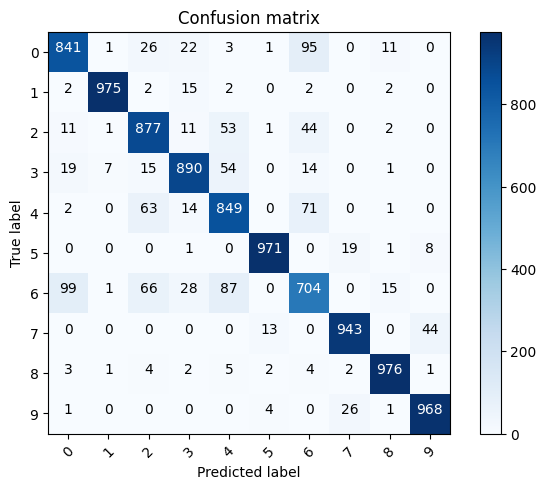

In [14]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, # Matriz de confusão
                          classes, # Classes
                          normalize=False, # Normalização
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues # Cor
                          ):
    # Normalização da matriz (nesse caso não será normalizada por conta do parametro)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    
    # Plotagem da matriz de confusão
    plt.imshow(cm, interpolation='nearest', cmap=cmap) # Imagem da matriz de confusão
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) # Marcas
    plt.xticks(tick_marks, classes, rotation=45) # Rótulos do eixo x com rotação
    plt.yticks(tick_marks, classes) # Rótulos do eixo y
    
    # Formatação dos números
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2. # Limiar para a cor do texto
    # Adicionando texto na matriz de confusão
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
    
    # Adicionando rótulos
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Fazendo a predição
p_test = model.predict(x_test).argmax(axis=1)
# gerando a matriz de confusão
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [15]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Dress Predicted: Pullover')

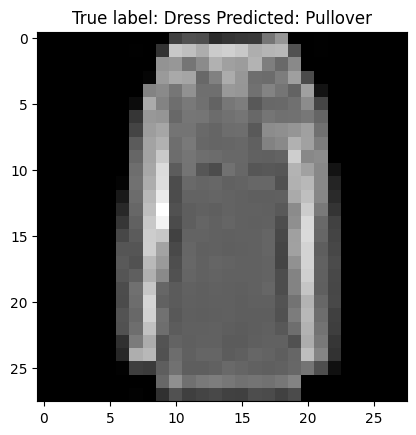

In [16]:
# Mostrando classificações incorretas
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))